In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
# Number of cities
N = 10
# City distances
cityx = [0.4000, 0.2439, 0.1707, 0.2293, 0.5171, 0.8732, 0.6878, 0.8488, 0.6683, 0.6195]
cityy = [0.4439, 0.1463, 0.2293, 0.7610, 0.9414, 0.6536, 0.5219, 0.3609, 0.2536, 0.2634]

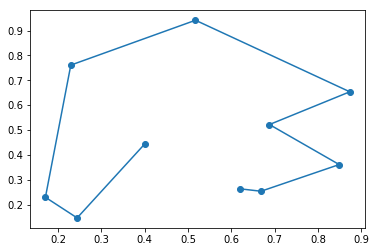

In [117]:
d = np.zeros([N,N])
# Calculate distance matrix
for i in range(N):
    for j in range(N):
        d[i, j]=np.sqrt((cityx[i]-cityx[j])**2+(cityy[i]-cityy[j])**2)
plt.plot(cityx, cityy, '-o')

![title](img/Sel1.png)
![title](img/Sel2.png)
Update rule for the energy function:
![title](img/Sel33.png)
Where
![title](img/Sel4.png)

In [235]:
# Set parameters for network energy function
A=500; B=500; C=1000; D=500; alpha=0.0001

In [245]:
# x-v-value of each node, y-u-input potential, u0-gamma
def hopfield():
    u0=0.02
    toend=0
    udao=np.zeros([N, N])
    ctr=0
    while toend==0:
        #print("Step # ", ctr)
        ctr+=1
        # U initialization
        v = np.random.rand(N,N)
        u = np.ones([N, N])*(-u0*np.log(N-1)/2)
        u+=u*0.91
        for _ in range(1000):
            for vx in range(N):
                for vi in range(N):
                    j1,j2,j3,j4=0,0,0,0
                    # derivative 1 (sum over columns j!=vi)
                    for j in range(N):
                        if j!=vi:
                            j1+=v[vx, j]
                            #print(j, vi, j1)
                    j1*=-A
                    # derivative 2 (sum over rows y!=x)
                    for y in range(N):
                        if y!=vx:
                            j2+=v[y, vi]
                    j2*=-B
                    # derivative 3 (overall sum)
                    j3 = np.sum(v)
                    j3=-C*(j3-N)
                    #print(j3)
                    # derivative 4
                    for y in range(N):
                        if y!=vx:
                            if vi==0:
                                j4+=d[vx, y]*(v[y, vi+1]+v[y, N-1])
                            elif vi==N-1:
                                j4+=d[vx, y]*(v[y, vi-1]+v[y, 0])
                            else:
                                j4+=d[vx, y]*(v[y, vi+1]+v[y, vi-1])
                    j4*=-D
                    udao[vx, vi]= -u[vx, vi]+j1+j2+j3+j4
            # update status and derivatives
            u=u+alpha*udao
            # calculate node value from input potential u
            v=(1+np.tanh(u/u0))/2
            # threshold
            for vx in range(N):
                for vi in range(N):
                    if(v[vx, vi]<0.7):
                        v[vx, vi]=0
                    if(v[vx, vi]>=0.7):
                        v[vx, vi]=1
        # testing whether solution is legal
        t1, t2, t3 = 0, 0, 0
        # require total of N-nodes with 1 value
        t1=0;
        for vx in range(N):
            for vi in range(N):
                t1+=v[vx, vi]
        # allow only one node in each row equal 1
        t2=0
        for x in range(N):
            for i in range(N-1):
                for j in range(i+1, N):
                    t2+=np.multiply(v[x, i], v[x, j])
    #                 # allow only one node in each column equal 1
        t3=0
        for i in range(N):
            for x in range(N-1):
                for y in range(x+1, N):
                    t3+=np.multiply(v[x, i], v[y, i])
        # stop the loop after getting the valid solution
        if t1==N and t2==0 and t3==0:
            toend = 1
        else:
            toend = 0
        #print("Test 1: {} Test 2: {} Test 3: {}".format(t1, t2, t3))
    #print(v)
    return(v, ctr)

In [226]:
def total_distance(v):
    cityx_final = np.zeros([N+1])
    cityy_final = np.zeros([N+1])
    for j in range(N):
        for i in range(N):
            if v[i,j]==1:
                cityx_final[j]=cityx[i]
                cityy_final[j]=cityy[i]

    cityx_final[N]=cityx_final[0]
    cityy_final[N]=cityy_final[0]
    # calculate the total distance
    td=0
    for i in range(N-1):
        td+=np.sqrt((cityx_final[i]-cityx_final[i+1])**2
                    +(cityy_final[i]-cityy_final[i+1])**2)
    td+=np.sqrt((cityx_final[N-1]-cityx_final[0])**2
                +(cityy_final[N-1]-cityy_final[0])**2)
    return(td, cityx_final, cityy_final)

In [227]:
# define desired city sequence
v_ideal = np.zeros([N,N])
# 0-A, 1-B, 2-C, 3-D, 4-E...I-9, J-9
seq=[0, 3, 4, 5, 6, 7, 8, 9, 1, 2]
j=0
for el in seq:
    v_ideal[el, j]=1
    j+=1
print(v_ideal)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]


In [248]:
v = np.zeros([N,N])
# desired total distance
des_td = 2.6907
ct=0
optimal_list = []
while True:
    ct+=1
    v, steps = hopfield()
    td, _, _ = total_distance(v)
    if np.array_equiv(v, v_ideal):
        print("Desired city sequence and distance achieved for {} runs".format(ct))
        print(v)
        print("Distance: ", td)
        optimal_list.append(v)
        break
    elif td<=des_td:
        print("Achieved desired distance for {} runs".format(ct))
        print(v)
        print(td)
        optimal_list.append(v)
    else:
        print("No desired solution, executed for {} steps, total distance {}".format(steps, td))

No desired solution, executed for 7 steps, total distance 2.8621509790538173
No desired solution, executed for 4 steps, total distance 2.9411164982377134
No desired solution, executed for 1 steps, total distance 3.159614524802982
No desired solution, executed for 3 steps, total distance 3.6885184001042997
No desired solution, executed for 1 steps, total distance 2.9847045784915927
No desired solution, executed for 1 steps, total distance 2.9847045784915935
No desired solution, executed for 13 steps, total distance 3.2321647412874297
No desired solution, executed for 1 steps, total distance 3.3992063029655544
No desired solution, executed for 9 steps, total distance 3.1863172771969857
No desired solution, executed for 1 steps, total distance 2.8303986561270875
No desired solution, executed for 3 steps, total distance 3.230114448205219
No desired solution, executed for 1 steps, total distance 2.774177443030279
No desired solution, executed for 1 steps, total distance 3.324452679467156
No

In [274]:
def get_route(v):
    route = ""
    for j in range(v.shape[1]):
        route += str(np.argmax(v[:, j])) + '=>'
    return (route + str(np.argmax(v[:, 0])))

In [275]:
print(get_route(v_ideal))

0=>3=>4=>5=>6=>7=>8=>9=>1=>2=>0


In [284]:
def annot_plot(N, cityx, cityy):
    labels = np.arange(10)
    for label, x, y in zip(labels, cityx, cityy):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Total distance:  2.69067063701
Desired city sequence: 0=>3=>4=>5=>6=>7=>8=>9=>1=>2=>0 
 Final permutation matrix 
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]
Obtained city sequence: 7=>8=>9=>1=>2=>0=>3=>4=>5=>6=>7 
 Final permutation matrix 
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  

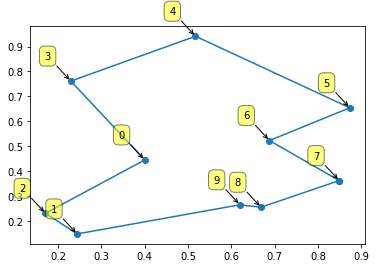

In [290]:
v = optimal_list[0]
td, X, Y = total_distance(v)
print("Total distance: ", td)
plt.plot(X, Y,'o-');
annot_plot(N, cityx, cityy)
print("Desired city sequence: {} \n Final permutation matrix \n{}".format(get_route(v_ideal), v_ideal))
print("Obtained city sequence: {} \n Final permutation matrix \n{}".format(get_route(v), v))

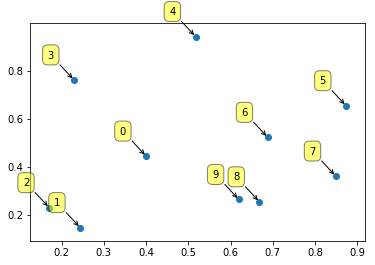

In [282]:
plt.scatter(cityx, cityy)

labels = np.arange(10)
for label, x, y in zip(labels, cityx, cityy):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))